In [20]:
import warnings
warnings.filterwarnings("ignore")
import logging
logging.basicConfig(level=logging.ERROR)
import pandas as pd

sunspots_data=pd.read_csv('D:\\_NILESH\\dissertation\\data\\sunspots.csv')

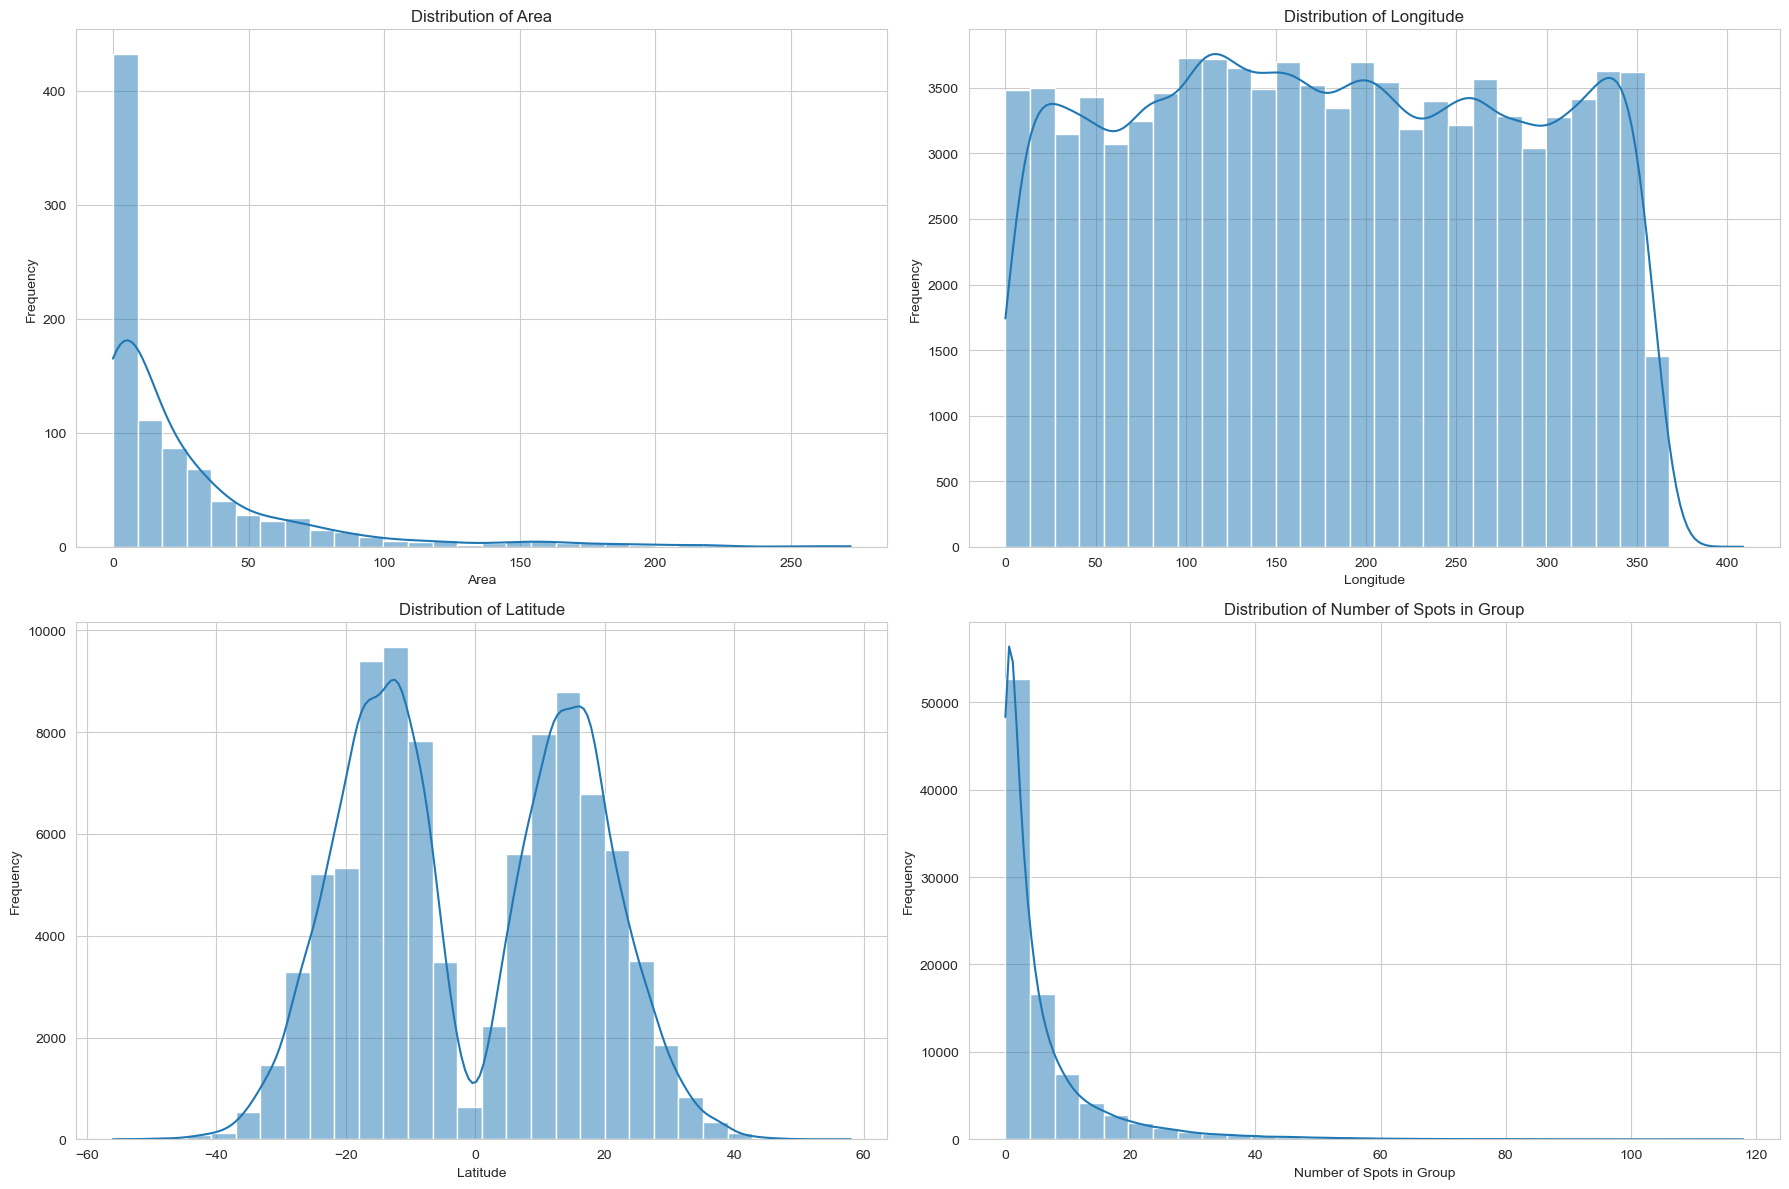

In [22]:
# Load the dataset again
sunspots_data=pd.read_csv('D:\\_NILESH\\dissertation\\data\\sunspots.csv')

# Filter the dataset to include only the specified columns
selected_columns = [
    'Year', 'Month', 'Day',  # For constructing the 'date'
    'Observed umbral area',  # 'area'
    'Carrington Longitude',  # 'longitude'
    'Latitude',  # 'latitude'
    'Number of spots in group',  # 'number_of_spots_in_group'
    'Zurich/McIntosh group type',  # 'zurich/mcintosh_group_type'
    'Magnetic group type'  # 'magnetic_group_type'
]
filtered_data = sunspots_data[selected_columns].copy()

# Construct the 'date' column from 'Year', 'Month', and 'Day'
filtered_data['date'] = pd.to_datetime(filtered_data[['Year', 'Month', 'Day']])
filtered_data.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# Rename columns for easier reference
filtered_data.rename(columns={
    'Observed umbral area': 'area',
    'Carrington Longitude': 'longitude',
    'Latitude': 'latitude',
    'Number of spots in group': 'number_of_spots_in_group',
    'Zurich/McIntosh group type': 'zurich/mcintosh_group_type',
    'Magnetic group type': 'magnetic_group_type'
}, inplace=True)

# Display the first few rows of the filtered data
filtered_data.head()




# Setting up the style for plots
sns.set_style("whitegrid")

# 4. Visualizing the Data

# Histograms for continuous variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

sns.histplot(filtered_data['area'], kde=True, ax=axes[0, 0], bins=30)
axes[0, 0].set_title('Distribution of Area')
axes[0, 0].set_xlabel('Area')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(filtered_data['longitude'], kde=True, ax=axes[0, 1], bins=30)
axes[0, 1].set_title('Distribution of Longitude')
axes[0, 1].set_xlabel('Longitude')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(filtered_data['latitude'], kde=True, ax=axes[1, 0], bins=30)
axes[1, 0].set_title('Distribution of Latitude')
axes[1, 0].set_xlabel('Latitude')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(filtered_data['number_of_spots_in_group'], kde=True, ax=axes[1, 1], bins=30)
axes[1, 1].set_title('Distribution of Number of Spots in Group')
axes[1, 1].set_xlabel('Number of Spots in Group')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('image/sunspot_data_distribution.png')
plt.show()


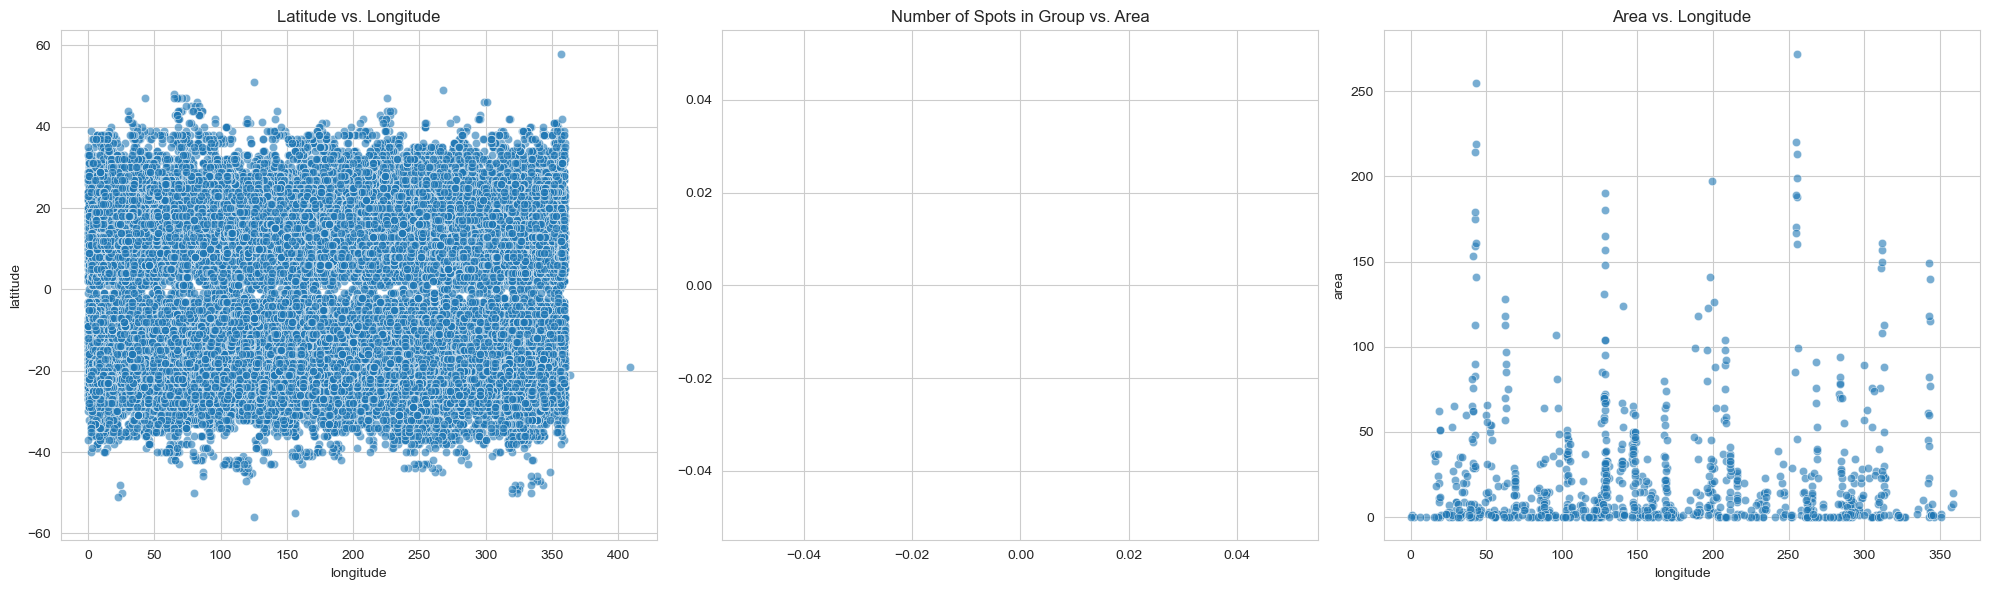

In [23]:
# Scatter plots for potential relationships between variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

sns.scatterplot(data=filtered_data, x='longitude', y='latitude', ax=axes[0], alpha=0.6)
axes[0].set_title('Latitude vs. Longitude')

sns.scatterplot(data=filtered_data, x='area', y='number_of_spots_in_group', ax=axes[1], alpha=0.6)
axes[1].set_title('Number of Spots in Group vs. Area')

sns.scatterplot(data=filtered_data, x='longitude', y='area', ax=axes[2], alpha=0.6)
axes[2].set_title('Area vs. Longitude')

plt.tight_layout()
plt.savefig('image/sunspot_data_distribution_scatter.png')
plt.show()


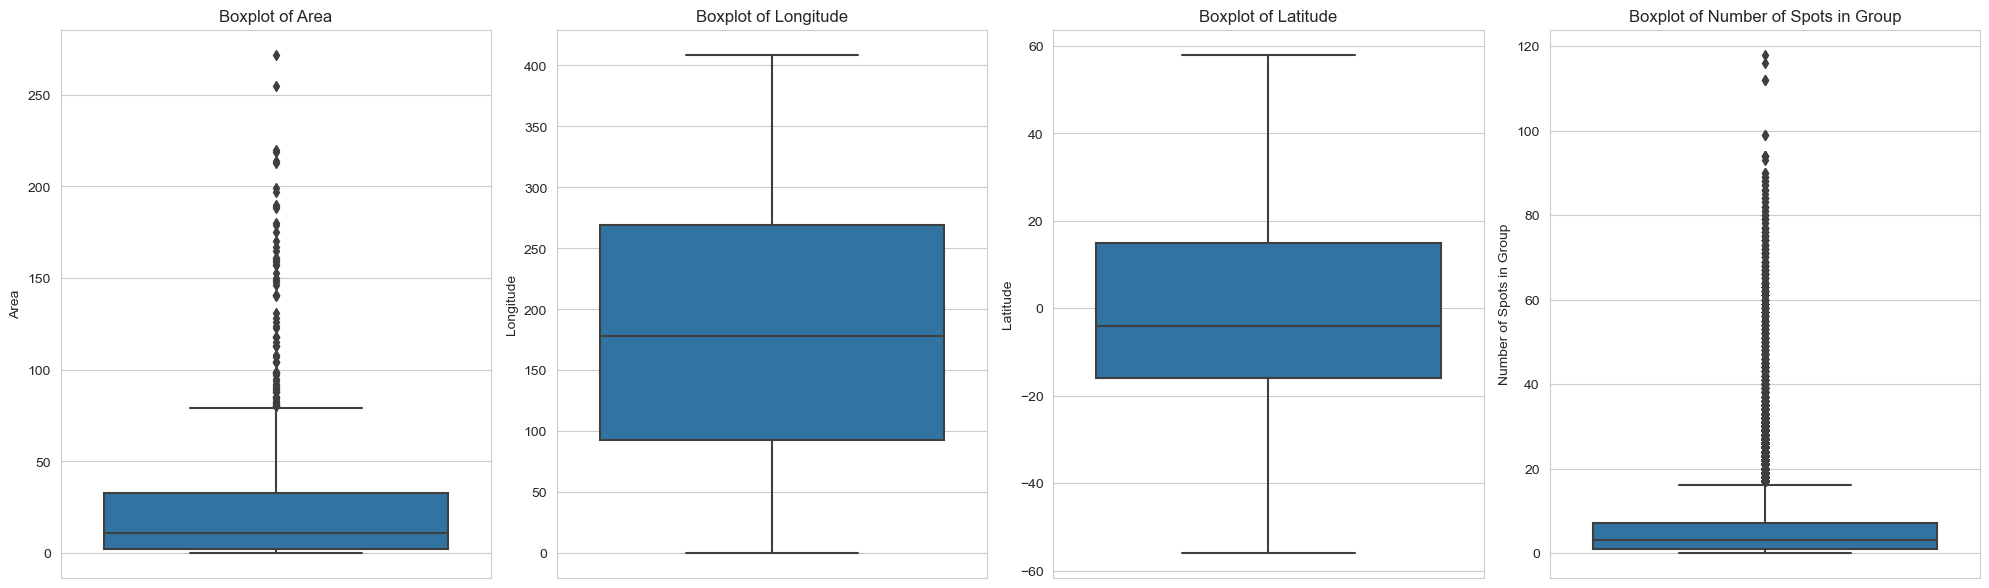

In [24]:
# Boxplots to understand spread and potential outliers
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))

sns.boxplot(y=filtered_data['area'], ax=axes[0])
axes[0].set_title('Boxplot of Area')
axes[0].set_ylabel('Area')

sns.boxplot(y=filtered_data['longitude'], ax=axes[1])
axes[1].set_title('Boxplot of Longitude')
axes[1].set_ylabel('Longitude')

sns.boxplot(y=filtered_data['latitude'], ax=axes[2])
axes[2].set_title('Boxplot of Latitude')
axes[2].set_ylabel('Latitude')

sns.boxplot(y=filtered_data['number_of_spots_in_group'], ax=axes[3])
axes[3].set_title('Boxplot of Number of Spots in Group')
axes[3].set_ylabel('Number of Spots in Group')

plt.tight_layout()
plt.savefig('image/sunspot_data_distribution_box.png')
plt.show()